# 데이터 전처리 연습
- 결측값 확인 -> 처리(삭제, 대체)
- 중복 데이터 제거
- 데이터 변환
- 이상값 처리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # 시각화 위한 라이브러리

## 1. 결측값 확인 및 처리
- pd.isnull
- pd.dropna
- pd.fillna

In [3]:
df = pd.DataFrame(np.random.randn(5,5), columns = ['V','W','X','Y','X'])
df

,V,W,X,Y,X
0,0.964313,-0.228438,-0.671283,-0.774664,0.261527
1,0.882811,-1.006984,-0.542778,-0.881047,-1.270984
2,-0.463337,0.848803,-0.297442,1.099850,-1.180496
3,1.139736,-0.679994,-0.759735,1.372837,-0.298454
4,2.777798,0.062158,-0.494135,0.840783,0.074297


In [5]:
df_nan = df[df>-1]
df_nan

,V,W,X,Y,X
0,0.964313,-0.228438,-0.671283,-0.774664,0.261527
1,0.882811,NaN,-0.542778,-0.881047,NaN
2,-0.463337,0.848803,-0.297442,1.099850,NaN
3,1.139736,-0.679994,-0.759735,1.372837,-0.298454
4,2.777798,0.062158,-0.494135,0.840783,0.074297


In [6]:
df_nan.isnull()

,V,W,X,Y,X
0,False,False,False,False,False
1,False,True,False,False,True
2,False,False,False,False,True
3,False,False,False,False,False
4,False,False,False,False,False


In [8]:
df_nan.dropna() #행 기준

,V,W,X,Y,X
0,0.964313,-0.228438,-0.671283,-0.774664,0.261527
3,1.139736,-0.679994,-0.759735,1.372837,-0.298454
4,2.777798,0.062158,-0.494135,0.840783,0.074297


In [10]:
df_nan.dropna(axis=1) #열 기준

,V,X,Y
0,0.964313,-0.671283,-0.774664
1,0.882811,-0.542778,-0.881047
2,-0.463337,-0.297442,1.099850
3,1.139736,-0.759735,1.372837
4,2.777798,-0.494135,0.840783


In [11]:
df_nan.fillna(0)

,V,W,X,Y,X
0,0.964313,-0.228438,-0.671283,-0.774664,0.261527
1,0.882811,0.000000,-0.542778,-0.881047,0.000000
2,-0.463337,0.848803,-0.297442,1.099850,0.000000
3,1.139736,-0.679994,-0.759735,1.372837,-0.298454
4,2.777798,0.062158,-0.494135,0.840783,0.074297


In [13]:
df_nan.fillna(df_nan.mean()) #결측치에 평균

,V,W,X,Y,X
0,0.964313,-0.228438,-0.671283,-0.774664,0.261527
1,0.882811,0.000632,-0.542778,-0.881047,-0.553075
2,-0.463337,0.848803,-0.297442,1.099850,-0.553075
3,1.139736,-0.679994,-0.759735,1.372837,-0.298454
4,2.777798,0.062158,-0.494135,0.840783,0.074297


## 2. 중복데이터 제거
- df.duplicated
- df.drop_duplicates

In [17]:
data = {'A' : [1,3,4,7,1], 'B' : [2,3,5,10,2]}

df= pd.DataFrame(data)
df

,A,B
0,1,2
1,3,3
2,4,5
3,7,10
4,1,2


In [18]:
df.duplicated() #앞에 나온 데이터 살고 뒤에 나온 데이터 중복으로 인식 => 행

0    False
1    False
2    False
3    False
4     True
dtype: bool

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df

,A,B
0,1,2
1,3,3
2,4,5
3,7,10


# 3. 데이터 변환
- 데이터 자료형을 적절한 형태로 변환
- 하나의 열이 여러 개의 정보를 가지고 있을 경우 열을 분리
- 특정 데이터의 편향도가 클 경우 데이터 분포를 정규분포로 변형

In [21]:
date = pd.date_range(start='2018-04-24', end = '2018-04-27', periods = 10)
date

DatetimeIndex(['2018-04-24 00:00:00', '2018-04-24 08:00:00',
               '2018-04-24 16:00:00', '2018-04-25 00:00:00',
               '2018-04-25 08:00:00', '2018-04-25 16:00:00',
               '2018-04-26 00:00:00', '2018-04-26 08:00:00',
               '2018-04-26 16:00:00', '2018-04-27 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [23]:
df = pd.DataFrame(np.random.randn(10,4))
df['date'] = date
df

,0,1,2,3,date
0,-0.825748,1.126079,0.437809,0.498138,2018-04-24 00:00:00
1,-1.403645,0.321977,0.280480,-0.803689,2018-04-24 08:00:00
2,-0.676461,0.248311,-0.828463,2.095986,2018-04-24 16:00:00
3,-1.049589,1.178182,-0.047384,-1.181576,2018-04-25 00:00:00
4,0.058421,0.281103,0.505274,0.140489,2018-04-25 08:00:00
5,-0.629958,-0.074694,-0.932458,1.634408,2018-04-25 16:00:00
6,-0.414531,-0.183883,-0.501807,-1.051866,2018-04-26 00:00:00
7,-2.220061,-0.901155,0.521845,-0.023746,2018-04-26 08:00:00
8,-0.080414,-0.494561,-0.163319,1.065891,2018-04-26 16:00:00
9,-1.350858,-0.605693,2.294435,-0.637160,2018-04-27 00:00:00


In [24]:
# 업무시간과 비업무시간을 구분해서 새로운 열을 만들어봅시다.
df['Workhour'] = False
df

,0,1,2,3,date,Workhour
0,-0.825748,1.126079,0.437809,0.498138,2018-04-24 00:00:00,False
1,-1.403645,0.321977,0.280480,-0.803689,2018-04-24 08:00:00,False
2,-0.676461,0.248311,-0.828463,2.095986,2018-04-24 16:00:00,False
3,-1.049589,1.178182,-0.047384,-1.181576,2018-04-25 00:00:00,False
4,0.058421,0.281103,0.505274,0.140489,2018-04-25 08:00:00,False
5,-0.629958,-0.074694,-0.932458,1.634408,2018-04-25 16:00:00,False
6,-0.414531,-0.183883,-0.501807,-1.051866,2018-04-26 00:00:00,False
7,-2.220061,-0.901155,0.521845,-0.023746,2018-04-26 08:00:00,False
8,-0.080414,-0.494561,-0.163319,1.065891,2018-04-26 16:00:00,False
9,-1.350858,-0.605693,2.294435,-0.637160,2018-04-27 00:00:00,False


In [26]:
for idx, row in df.iterrows(): #데이터를 한줄 한줄 불러옴
    cond = (row['date'].hour >= 9) & (row['date'].hour <18)
    df.loc[idx, 'Workhour'] = cond
    
df

,0,1,2,3,date,Workhour
0,-0.825748,1.126079,0.437809,0.498138,2018-04-24 00:00:00,False
1,-1.403645,0.321977,0.280480,-0.803689,2018-04-24 08:00:00,False
2,-0.676461,0.248311,-0.828463,2.095986,2018-04-24 16:00:00,True
3,-1.049589,1.178182,-0.047384,-1.181576,2018-04-25 00:00:00,False
4,0.058421,0.281103,0.505274,0.140489,2018-04-25 08:00:00,False
5,-0.629958,-0.074694,-0.932458,1.634408,2018-04-25 16:00:00,True
6,-0.414531,-0.183883,-0.501807,-1.051866,2018-04-26 00:00:00,False
7,-2.220061,-0.901155,0.521845,-0.023746,2018-04-26 08:00:00,False
8,-0.080414,-0.494561,-0.163319,1.065891,2018-04-26 16:00:00,True
9,-1.350858,-0.605693,2.294435,-0.637160,2018-04-27 00:00:00,False


# 4. 이상값 처리
- 특정 열의 데이터가 정상 분포를 벗어나는 경우, 이상 값으로 간주
- 극단적으로 크거나 작은 값 제거

In [27]:
df = pd.DataFrame(np.random.rand(10,5), columns=['A','B','C','D','E'])
df

,A,B,C,D,E
0,0.933492,0.942812,0.933808,0.254941,0.297305
1,0.817378,0.641128,0.080373,0.961337,0.949613
2,0.927689,0.415759,0.765881,0.169501,0.368321
3,0.855119,0.248450,0.880887,0.267303,0.915391
4,0.780798,0.423136,0.371620,0.673332,0.040399
5,0.687027,0.628754,0.828198,0.577221,0.374476
6,0.517532,0.732975,0.380174,0.337438,0.250209
7,0.999542,0.607906,0.586860,0.257574,0.140267
8,0.469595,0.096508,0.002961,0.879843,0.612563
9,0.744380,0.599146,0.017576,0.973992,0.364784


<AxesSubplot:>

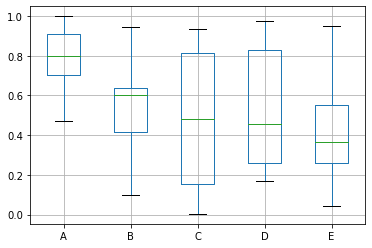

In [28]:
df.boxplot()

In [30]:
len(df[df['A'] > 0.6])

8

In [31]:
df[df['A'] > 0.6]

,A,B,C,D,E
0,0.933492,0.942812,0.933808,0.254941,0.297305
1,0.817378,0.641128,0.080373,0.961337,0.949613
2,0.927689,0.415759,0.765881,0.169501,0.368321
3,0.855119,0.248450,0.880887,0.267303,0.915391
4,0.780798,0.423136,0.371620,0.673332,0.040399
5,0.687027,0.628754,0.828198,0.577221,0.374476
7,0.999542,0.607906,0.586860,0.257574,0.140267
9,0.744380,0.599146,0.017576,0.973992,0.364784
